# **Natural Language Understanding**

In [ ]:
!pip install nltk
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize,wordpunct_tokenize, TweetTokenizer,RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics #accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

**Sentence Tokeniser**

In [ ]:
text="""'Welcome Mr. Smith' she said. 'I had not heard that folk of the Shire were so sweet-tongued. 
But I see that you are an Elf-friend; the light in your eyes and the ring in your voice tells it. 
This is a merry meeting! Sit now, and wait for the Master of the house! He will not be long. 
He is tending your tired beasts.'"""

#excerpt taken from Lord of the Rings
tokenized_text = sent_tokenize(text)
for i in tokenized_text:
    print(i)

'Welcome Mr. Smith' she said.
'I had not heard that folk of the Shire were so sweet-tongued.
But I see that you are an Elf-friend; the light in your eyes and the ring in your voice tells it.
This is a merry meeting!
Sit now, and wait for the Master of the house!
He will not be long.
He is tending your tired beasts.'


Word Tokeniser

In [ ]:
tokenized_word = word_tokenize(text)
for i in tokenized_word:
    print(i)

'Welcome
Mr.
Smith
'
she
said
.
'I
had
not
heard
that
folk
of
the
Shire
were
so
sweet-tongued
.
But
I
see
that
you
are
an
Elf-friend
;
the
light
in
your
eyes
and
the
ring
in
your
voice
tells
it
.
This
is
a
merry
meeting
!
Sit
now
,
and
wait
for
the
Master
of
the
house
!
He
will
not
be
long
.
He
is
tending
your
tired
beasts
.
'


**Tweet Tokeniser**

In [ ]:
tokeniser = TweetTokenizer()
tweet = "This is a cooool #hashtag1 @someone #dummysmiley: :) :-) :-P <3 and some arrows < > -> <--"
tokenized_tweet = tokeniser.tokenize(tweet)
for i in tokenized_tweet:
    print(i)

This
is
a
cooool
#hashtag1
@someone
#dummysmiley
:
:)
:-)
:-P
<3
and
some
arrows
<
>
->
<--


In [ ]:
tokenized_tweet_v2 = word_tokenize(tweet)
for i in tokenized_tweet_v2:
    print(i)

This
is
a
cooool
#
hashtag1
@
someone
#
dummysmiley
:
:
)
:
-
)
:
-P
<
3
and
some
arrows
<
>
-
>
<
--


# Sentiment Analysis - Scikit Learn

In [ ]:
df = pd.read_csv('/content/drive/My Drive/train.tsv', sep='\t')

In [ ]:
df.shape

(156060, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
df['Phrase']

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [ ]:
df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [ ]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

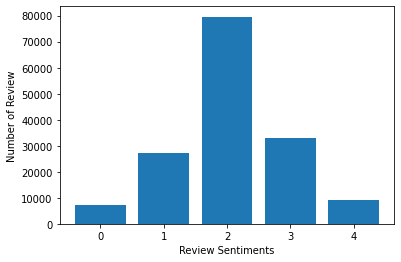

In [ ]:
Sentiment_count = df.groupby('Sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

# Count Vectorizer

In [ ]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['Phrase'])

In [ ]:
df.shape

(156060, 4)

In [ ]:
print(text_counts)

  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


# TFIDF Vectorizer

In [ ]:
tf = TfidfVectorizer()

text_tf = tf.fit_transform(df['Phrase'])
print(text_tf)

  (0, 12857)	0.12785637560254456
  (0, 8807)	0.1353879543646446
  (0, 13681)	0.07615285026452821
  (0, 593)	0.22068902883834374
  (0, 9085)	0.1898515417082945
  (0, 1879)	0.11034437734762885
  (0, 602)	0.26341877863818697
  (0, 9204)	0.19301332592202286
  (0, 14888)	0.28701927784529135
  (0, 12424)	0.1381592967010513
  (0, 5595)	0.265796263188737
  (0, 529)	0.1614381914318891
  (0, 5837)	0.22883807138484064
  (0, 5323)	0.20344769269023563
  (0, 5821)	0.2625302862532789
  (0, 7217)	0.17522921677393963
  (0, 14871)	0.1354415412970302
  (0, 13503)	0.08982508036989033
  (0, 288)	0.251134096800077
  (0, 13505)	0.17690005957760713
  (0, 3490)	0.2485059095620638
  (0, 4577)	0.278538658922562
  (0, 9227)	0.27061683772839323
  (0, 11837)	0.1761994204821687
  (1, 5837)	0.3782714454401254
  :	:
  (156050, 11465)	0.670263619653983
  (156050, 625)	0.2115725833396903
  (156050, 13505)	0.18632379802617538
  (156051, 9193)	0.6987248068627274
  (156051, 11465)	0.6822102168950972
  (156051, 625)	0.21534

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


# Sentiment Analysis - Textblob

In [ ]:
!pip install textblob
from textblob import TextBlob
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
 TextBlob('the weather today is bad :)').sentiment

Sentiment(polarity=-0.09999999999999992, subjectivity=0.8333333333333333)

In [ ]:
TextBlob('the weather today is bad :(').sentiment

Sentiment(polarity=-0.7249999999999999, subjectivity=0.8333333333333333)

In [ ]:
 TextBlob('the weather is good').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [ ]:
 TextBlob('it rained today').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

# Natural Language Generation

In [ ]:
pip install markovify

     |████████████████████████████████| 245kB 4.7MB/s 
  Created wheel for markovify: filename=markovify-0.8.2-cp36-none-any.whl size=18261 sha256=80cf8b37fec5a15b9f491fd887b7177a5d915e80b9fde6ad71bdde663612d35d
  Stored in directory: /root/.cache/pip/wheels/f4/3f/cc/c2750c71a820928e12f9609ff3a99d7b2c0d93eb61b7170189
Successfully built markovify


In [ ]:
pip install transformers

     |████████████████████████████████| 778kB 3.4MB/s 
     |████████████████████████████████| 3.0MB 16.5MB/s 
     |████████████████████████████████| 890kB 33.7MB/s 
     |████████████████████████████████| 1.1MB 27.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=f0714739ab40690666086c0902d613095564b14faa0f8798fba42231c1a56da9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
import markovify 
import ipywidgets as widgets
from transformers import pipeline

In [ ]:
df_news_headlines = pd.read_csv('/content/drive/My Drive/abcnews-date-text.csv')
df_news_headlines.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
text_model = markovify.NewlineText(df_news_headlines.headline_text, state_size = 2)

In [ ]:
# Print ten randomly-generated sentences using the built model
for i in range(10):
    print(text_model.make_sentence())

probe launched into fatal boat crash
sydney storms spark wimmera mallee areas
sumatra searches for explosives possession
writers block the sale of confidential treasury files human rights council
f1 equipment to be installed nsw south coast households without water
bes murray community mourns property developer threatened to burn four tonnes of wheat export issue divides citrus
cub named sea world workers walk off perth
rta under attack from dutch outbreak doctors and nurses at risk of sexual
tweets to at least nine young students killed
rescue teams starting to discuss dairy woes


In [ ]:
for i in range(10):
    print(text_model.make_short_sentence(1000))

eagles aim to double by 2075
chinese military unit to counter port pace: clarkson
nationals urge greater coral sea commemorated in melbourne
bracks urged to save farmland
suspected murder victim shot while sitting in on property risks
nepal announces new josh warneke
areas hardest hit with iron bar in european floods
telstra help would boost water wisdom
haigh a diplomatic incident
zimbabwe economic sanctions on burma
